In [66]:
import pandas
import array
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek

In [155]:
#plot condusion matrix
def plot_confusion_matrix2(cm_input, title='Normalized Confusion Matrix'):
    labels=['phishing','legitimate']
    cm = cm_input.astype('float') / cm_input.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.text(-0.15,0.05, '%.3f' %cm[0][0],fontsize=14,color = 'w')
    plt.text(0.8,0.05, '%.3f' %cm[0][1],fontsize=14,color = 'k')
    plt.text(-0.15,1.05, '%.3f' %cm[1][0],fontsize=14,color = 'k')
    plt.text(0.8,1.05, '%.3f' %cm[1][1],fontsize=14,color = 'w')
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    # show confusion matrix
    plt.show()

In [6]:
#loading data
data_X=pandas.read_csv(r"data_X.csv",header = None)
data_y=pandas.read_csv(r"data_y.csv",header = None)

#Balancing data
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(data_X, data_y)

#reshaping data
X_res=X_res.values
y_res=y_res.values.ravel()

#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

Accuracy: 0.8920656176765986


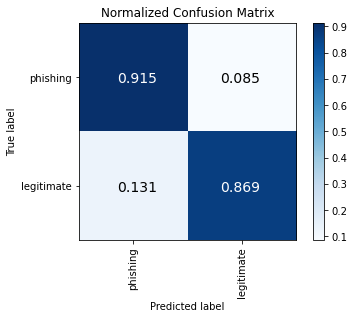

In [162]:
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)
y_pred=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc=clf.score(X_test, y_test)
print('Accuracy:',acc)
plot_confusion_matrix2(cm)

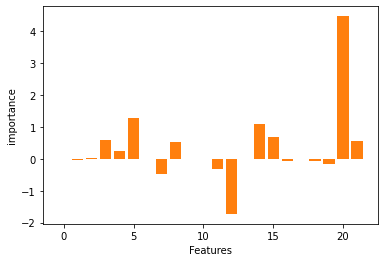

In [168]:
importance = clf.coef_[0]
features=['cookie_len','form_num','anchor_num','input_email','input_password','hidden','ip_address','Request_url','redirect_page','Mouse_event','right_click','Iframe','web_traffic','number','ifEmail','DNSRecord','ifSymbolAT','url_length','domain_length','subdomain_length','is_https','special_char']
for i,v in enumerate(importance):  
    #print(i,':',features[i], v)  
    plt.bar([x for x in range(len(importance))], importance)  
plt.ylabel('importance')
plt.xlabel('Features')
plt.show()  

In [77]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}